# Project 3

## Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Load and Prepare Data

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

#Concatenate the default splitted data
X = np.concatenate((X_train,  X_test))
y = np.concatenate((y_train, y_test))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
#Convert Labels into One-hot-Encoding format
y = keras.utils.to_categorical(y, num_classes=10)

Now I split the data into training set and test set and standardize the data to put all columns in the same scale.

In [4]:
#Split the data into training set and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

X_train_full, X_test = X_train_full/255.0, X_test/255.0

#Split the training data into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state = 42)

## Define Model

## Model Reuse and Activation Function Update

In the previous chapter, I built and optimized a deep neural network for image classification on the CIFAR-10 dataset.

The best hyperparameters I found for that model were:  
`{ 'learning_rate': 0.000193, 'optimizer': 'adam', 'units1': 150, 'units2': 50, 'units3': 50 }`

In this section, I reuse the same architecture and hyperparameters, but change the activation function in the hidden layers from **ReLU** to **SELU**. I also apply proper weight initialization using `lecun_normal`, to ensure that the network can benefit from SELU’s self-normalizing properties.

Later, I will compare this version with another setup where **BatchNormalization** is used instead of SELU, keeping everything else the same.


In [5]:
selu_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),  # CIFAR-10 input
    keras.layers.Dense(150, activation='selu', kernel_initializer='lecun_normal'),  # Hidden Layer 1
    keras.layers.Dense(50, activation='selu', kernel_initializer='lecun_normal'),   # Hidden Layer 2
    keras.layers.Dense(50, activation='selu', kernel_initializer='lecun_normal'),   # Hidden Layer 3
    keras.layers.Dense(10, activation="softmax")  # Output layer for classification
])

## Compile SELU Model

In [6]:
selu_model.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate = 0.000193), metrics=["accuracy"])

## Fit the SELU model

In [7]:
selu_history = selu_model.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))

start = time.time()
selu_history = selu_model.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))
end = time.time()

training_time = end - start
print()
print(f"Training time for Selu model: {training_time:.2f} seconds")

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2808 - loss: 2.0170 - val_accuracy: 0.3971 - val_loss: 1.7106
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3806 - loss: 1.7277 - val_accuracy: 0.4136 - val_loss: 1.6467
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4203 - loss: 1.6288 - val_accuracy: 0.4335 - val_loss: 1.5804
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4379 - loss: 1.5733 - val_accuracy: 0.4425 - val_loss: 1.5620
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4582 - loss: 1.5184 - val_accuracy: 0.4661 - val_loss: 1.5025
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4723 - loss: 1.4839 - val_accuracy: 0.4699 - val_loss: 1.4842
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4876 - loss: 1.4523 - val_accuracy: 0.4784 - val_loss: 1.4607
Epoch 8/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4933 - loss: 1.4173 -

In [ ]:
selu_model.save("selu_model.h5")

## Using Batch Normalization with  ReLU

In [ ]:
relu_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),  # CIFAR-10 input
    keras.layers.Dense(150, activation='relu', kernel_initializer='he_normal'),  # Hidden Layer 1
    keras.layers.BatchNormalization(),  # Add Batch Normalization layer

    keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),   # Hidden Layer 2
    keras.layers.BatchNormalization(),  # Add Batch Normalization layer

    keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),   # Hidden Layer 3
    keras.layers.BatchNormalization(),  # Add Batch Normalization layer
    keras.layers.Dense(10, activation="softmax")  # Output layer for classification
])


## Compile ReLU Model

In [ ]:
relu_model.compile(loss="categorical_crossentropy", optimizer = keras.optimizers.Adam(learning_rate = 0.000193), metrics=["accuracy"])

In [ ]:
relu_history = relu_model.fit(X_train, y_train, epochs=50, validation_data =(X_valid, y_valid))

Epoch 1/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2892 - loss: 2.0517 - val_accuracy: 0.3630 - val_loss: 1.8248
Epoch 2/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4030 - loss: 1.6953 - val_accuracy: 0.3914 - val_loss: 1.7184
Epoch 3/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4292 - loss: 1.6182 - val_accuracy: 0.4233 - val_loss: 1.6369
Epoch 4/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4420 - loss: 1.5698 - val_accuracy: 0.4012 - val_loss: 1.7012
Epoch 5/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4603 - loss: 1.5220 - val_accuracy: 0.4165 - val_loss: 1.6777
Epoch 6/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4716 - loss: 1.4900 - val_accuracy: 0.4152 - val_loss: 1.6543
Epoch 7/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4820 - loss: 1.4798 - val_accuracy: 0.4410 - val_loss: 1.5892
Epoch 8/50
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4888 - loss: 1.444

### Plot Accuracy and Loss for SELU Model and ReLU Model(with BatchNorm)

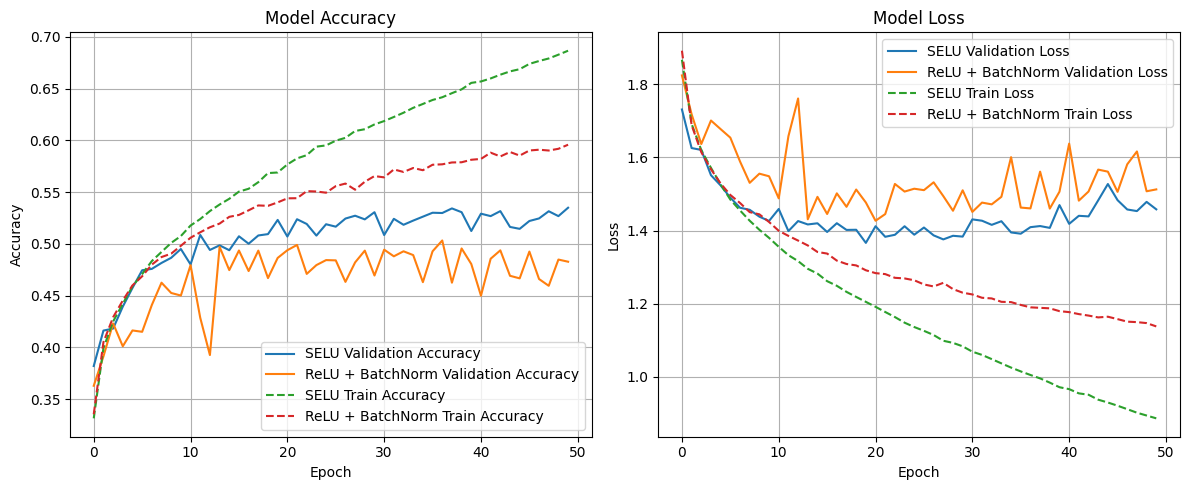

In [ ]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(selu_history.history['val_accuracy'], label='SELU Validation Accuracy')
plt.plot(relu_history.history['val_accuracy'], label='ReLU + BatchNorm Validation Accuracy')
plt.plot(selu_history.history['accuracy'], '--', label='SELU Train Accuracy')
plt.plot(relu_history.history['accuracy'], '--', label='ReLU + BatchNorm Train Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(selu_history.history['val_loss'], label='SELU Validation Loss')
plt.plot(relu_history.history['val_loss'], label='ReLU + BatchNorm Validation Loss')
plt.plot(selu_history.history['loss'], '--', label='SELU Train Loss')
plt.plot(relu_history.history['loss'], '--', label='ReLU + BatchNorm Train Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Based on the charts, the SELU model outperformed the ReLU + BatchNormalization model by achieving lower validation loss and higher accuracy.

### Comparing Models Performances on the Test Data

In [ ]:
# Evaluate on test data
selu_test_loss, selu_test_acc = selu_model.evaluate(X_test, y_test)
relu_test_loss, relu_test_acc = relu_model.evaluate(X_test, y_test)

print("SELU Model - Test Accuracy:", selu_test_acc, ", Test Loss:", selu_test_loss)
print("ReLU + BatchNorm Model - Test Accuracy:", relu_test_acc, ", Test Loss:", relu_test_loss)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5118 - loss: 1.5094
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4665 - loss: 1.5696
SELU Model - Test Accuracy: 0.5139999985694885 , Test Loss: 1.5105420351028442
ReLU + BatchNorm Model - Test Accuracy: 0.4707777798175812 , Test Loss: 1.5569920539855957


On the test set, the SELU-based model achieved higher accuracy (51.4%) and lower loss (1.51) compared to the ReLU + BatchNormalization model, which reached 47.07% accuracy and a loss of 1.56. These results confirm that using SELU activation with proper initialization can lead to better generalization performance on CIFAR-10 in this particular network architecture.

## Horse or Not Horse Classification

In [ ]:
# convert one-hot-encoded y back to labels
y_labels = np.argmax(y, axis=1)

# finding indices of horses and non-horses images
horse_idx = np.where(y_labels == 7)[0]
non_horse_idx = np.where(y_labels != 7)[0]

# shuffle before selecting samples
np.random.shuffle(horse_idx)
np.random.shuffle(non_horse_idx)

# select 3000 from each label to make data balanced
horse_idx = horse_idx[:3000]
non_horse_idx = non_horse_idx[:3000]

# concatenate indices and shuffle it again
selected_idx = np.concatenate([horse_idx, non_horse_idx])
np.random.shuffle(selected_idx)

# final
X_binary = X[selected_idx]
y_binary = np.where(y_labels[selected_idx] == 7, 1, 0) # 1 for horse and zero for others

#y_binary = (y_binary == 7).astype(np.float32)  # 1 for horse and zero for others


In [ ]:
#Split the binary data into training set and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X_binary, y_binary, test_size=0.15, stratify=y_binary, random_state = 42)

X_train_full, X_test = X_train_full/255.0, X_test/255.0

#Split the training data into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state = 42)

I don't want the original model to be changed. So I clone the `selu_model` and use the cloned model weights for training.

In [ ]:
cloned_model = keras.models.clone_model(selu_model)
cloned_model.set_weights(selu_model.get_weights())

In this step,  I freeze all the layers except the last layer.Then copy these freezed layer to binary model and add new output layer with `sigmoid`.

In [ ]:
for layer in  cloned_model.layers[:-1]:
  layer.trainable = False

binary_model = keras.models.Sequential(cloned_model.layers[:-1])
binary_model.add(keras.layers.Dense(1, activation="sigmoid")) # Output layer for Binary classification using sigmoid

Before training I check if desired layers of `selu_model` are freezed or not:

In [ ]:
for i, layer in enumerate(binary_model.layers):
    print(f"{i}: {layer.name} - Trainable: {layer.trainable}")

0: flatten - Trainable: False
1: dense - Trainable: False
2: dense_1 - Trainable: False
3: dense_2 - Trainable: False
4: dense_8 - Trainable: True


In [ ]:
binary_model.compile(loss="binary_crossentropy", optimizer = "sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
binary_model_history = binary_model.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))
end = time.time()

training_time = end - start
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6935 - loss: 0.7347 - val_accuracy: 0.8039 - val_loss: 0.4044
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8117 - loss: 0.4167 - val_accuracy: 0.8235 - val_loss: 0.3593
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8377 - loss: 0.3742 - val_accuracy: 0.8327 - val_loss: 0.3389
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8460 - loss: 0.3525 - val_accuracy: 0.8431 - val_loss: 0.3279
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8431 - loss: 0.3520 - val_accuracy: 0.8471 - val_loss: 0.3215
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8570 - loss: 0.3311 - val_accuracy: 0.8510 - val_loss: 0.3163
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8564 - loss: 0.3363 - val_accuracy: 0.8484 - val_loss: 0.3116
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8601 - loss: 0.3370 - val_accuracy: 0.

In [ ]:
binary_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │       460,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,103 (1.80 MB)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 471,050 (1.80 MB)

 Optimizer params: 2 (12.00 B)

## Comparing with Unfrozen Model

In [ ]:
cloned_model2 = keras.models.clone_model(selu_model)
cloned_model2.set_weights(selu_model.get_weights())

In [ ]:
binary_model2 = keras.models.Sequential(cloned_model2.layers[:-1])
binary_model2.add(keras.layers.Dense(1, activation="sigmoid")) # Output layer for Binary classification using sigmoid

Now I check if all layers are unfrozen and trainable or not:

In [ ]:
for i, layer in enumerate(binary_model2.layers):
    print(f"{i}: {layer.name} - Trainable: {layer.trainable}")

0: flatten - Trainable: True
1: dense - Trainable: True
2: dense_1 - Trainable: True
3: dense_2 - Trainable: True
4: dense_9 - Trainable: True


In [ ]:
binary_model2.compile(loss="binary_crossentropy", optimizer = "sgd", metrics=["accuracy"])

In [ ]:
start = time.time()
binary_model_history2 = binary_model2.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))
end = time.time()

training_time = end - start
print(f"Training time for unfrozen model: {training_time:.2f} seconds")

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7464 - loss: 0.5565 - val_accuracy: 0.8418 - val_loss: 0.3545
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8478 - loss: 0.3481 - val_accuracy: 0.8405 - val_loss: 0.3587
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8624 - loss: 0.3234 - val_accuracy: 0.8484 - val_loss: 0.3416
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8771 - loss: 0.3003 - val_accuracy: 0.8523 - val_loss: 0.3249
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8874 - loss: 0.2747 - val_accuracy: 0.8431 - val_loss: 0.3493
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8809 - loss: 0.2791 - val_accuracy: 0.8562 - val_loss: 0.3112
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8817 - loss: 0.2748 - val_accuracy: 0.8222 - val_loss: 0.4049
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8971 - loss: 0.2522 - val_accuracy: 0.

In [ ]:
# Evaluate on test data
binary_model_test_loss, binary_model_test_acc = binary_model.evaluate(X_test, y_test)
binary_model2_test_loss, binary_model2_test_acc = binary_model2.evaluate(X_test, y_test)

print("Frozen Model - Test Accuracy:", binary_model_test_acc, ", Test Loss:", binary_model_test_loss)
print("Unfrozen Model - Test Accuracy:", binary_model2_test_acc, ", Test Loss:", binary_model2_test_loss)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8795 - loss: 0.2944
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8719 - loss: 0.4052 
Frozen Model - Test Accuracy: 0.8677777647972107 , Test Loss: 0.3127477467060089
Unfrozen Model - Test Accuracy: 0.8577777743339539 , Test Loss: 0.48988696932792664


### 📊 **Comparison and Analysis – Transfer Learning (Frozen vs Unfrozen)**

After training and evaluating both transfer learning strategies (with frozen and unfrozen layers), we compared their performance on both validation and test sets, along with their training time.

#### ✅ **Results Summary:**

| Model Type         | Train Accuracy | Val Accuracy | Test Accuracy | Train Time (s) |
| ------------------ | -------------- | ------------ | ------------- | -------------- |
| **Frozen Model**   | 0.86           | 0.87         | **0.86**      | **\~28.75s**   |
| **Unfrozen Model** | **0.99**       | 0.85         | 0.85          | \~31.22s       |

### 🧠 **Observations & Conclusion:**

* The **Frozen Model** (with only the final layer trainable) trained **faster** and **generalized better** on the test set. It achieved higher test accuracy with lower loss despite shorter training.
* The **Unfrozen Model** had more flexibility (all weights trainable), and reached a very high training accuracy. However, it took longer to train and showed signs of ‍`overfitting`, as its performance on validation and test sets was slightly worse.
* These results highlight a key trade-off in transfer learning:

  * Freezing layers = faster training + better generalization (especially with small datasets)
  * Unfreezing layers = more learning capacity, but also higher risk of overfitting and longer training time
* ✅ Therefore, in limited data scenarios like this one (only 6000 samples), **freezing pretrained layers** while only training the final layer is often the more effective and efficient strategy.


## Using Different Optimizers

### Using SGD with momentum

In [ ]:
cloned_model_sgd_with_momentum = keras.models.clone_model(selu_model)
cloned_model_sgd_with_momentum.set_weights(selu_model.get_weights())

for layer in  cloned_model_sgd_with_momentum.layers[:-1]:
  layer.trainable = False

sgd_with_momentum_model = keras.models.Sequential(cloned_model_sgd_with_momentum.layers[:-1])
sgd_with_momentum_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

sgd_with_momentum_model.compile(loss="binary_crossentropy", optimizer = optimizer, metrics=["accuracy"])

sgd_with_momentum_history = sgd_with_momentum_model.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7158 - loss: 0.6890 - val_accuracy: 0.8092 - val_loss: 0.3895
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8170 - loss: 0.3958 - val_accuracy: 0.8405 - val_loss: 0.3476
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8425 - loss: 0.3582 - val_accuracy: 0.8444 - val_loss: 0.3258
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8465 - loss: 0.3544 - val_accuracy: 0.8510 - val_loss: 0.3147
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8467 - loss: 0.3489 - val_accuracy: 0.8562 - val_loss: 0.3078
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8563 - loss: 0.3198 - val_accuracy: 0.8549 - val_loss: 0.3048
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8511 - loss: 0.3329 - val_accuracy: 0.8601 - val_loss: 0.3006
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8594 - loss: 0.3258 - val_accuracy: 0.

### Nesterov SGD with momentum

In [ ]:
cloned_model_nesterov_sgd = keras.models.clone_model(selu_model)
cloned_model_nesterov_sgd.set_weights(selu_model.get_weights())

for layer in  cloned_model_nesterov_sgd.layers[:-1]:
  layer.trainable = False

nesterov_sgd_model = keras.models.Sequential(cloned_model_nesterov_sgd.layers[:-1])
nesterov_sgd_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
nesterov_optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

nesterov_sgd_model.compile(loss="binary_crossentropy", optimizer = nesterov_optimizer, metrics=["accuracy"])

nesterov_history = nesterov_sgd_model.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6533 - loss: 0.7836 - val_accuracy: 0.7817 - val_loss: 0.4322
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8182 - loss: 0.4070 - val_accuracy: 0.8353 - val_loss: 0.3577
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8335 - loss: 0.3695 - val_accuracy: 0.8562 - val_loss: 0.3305
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8497 - loss: 0.3451 - val_accuracy: 0.8654 - val_loss: 0.3167
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8484 - loss: 0.3435 - val_accuracy: 0.8680 - val_loss: 0.3090
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8537 - loss: 0.3279 - val_accuracy: 0.8627 - val_loss: 0.3046
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8474 - loss: 0.3378 - val_accuracy: 0.8654 - val_loss: 0.3000
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8546 - loss: 0.3141 - val_accuracy: 0.

### AdaGrad

In [ ]:
cloned_model_adagrad = keras.models.clone_model(selu_model)
cloned_model_adagrad.set_weights(selu_model.get_weights())

for layer in  cloned_model_adagrad.layers[:-1]:
  layer.trainable = False

adagrad_model = keras.models.Sequential(cloned_model_adagrad.layers[:-1])
adagrad_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
adagrad_optimizer =  keras.optimizers.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)

adagrad_model.compile(loss="binary_crossentropy", optimizer = adagrad_optimizer, metrics=["accuracy"])

adagrad_history = adagrad_model.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5715 - loss: 0.9557 - val_accuracy: 0.5895 - val_loss: 0.9452
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5940 - loss: 0.9054 - val_accuracy: 0.6039 - val_loss: 0.8991
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6032 - loss: 0.8709 - val_accuracy: 0.6209 - val_loss: 0.8672
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6304 - loss: 0.7964 - val_accuracy: 0.6248 - val_loss: 0.8421
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6344 - loss: 0.7973 - val_accuracy: 0.6327 - val_loss: 0.8215
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6230 - loss: 0.8084 - val_accuracy: 0.6392 - val_loss: 0.8039
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6479 - loss: 0.7656 - val_accuracy: 0.6444 - val_loss: 0.7884
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6607 - loss: 0.7271 - val_accuracy: 0.

### Adam

In [ ]:
cloned_model_adam = keras.models.clone_model(selu_model)
cloned_model_adam.set_weights(selu_model.get_weights())

for layer in  cloned_model_adam.layers[:-1]:
  layer.trainable = False

adam_model = keras.models.Sequential(cloned_model_adam.layers[:-1])
adam_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

adam_model.compile(loss="binary_crossentropy", optimizer = adam_optimizer, metrics=["accuracy"])

adam_history = adam_model.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4798 - loss: 1.0311 - val_accuracy: 0.6797 - val_loss: 0.6061
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7111 - loss: 0.5696 - val_accuracy: 0.7882 - val_loss: 0.4504
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7942 - loss: 0.4486 - val_accuracy: 0.8183 - val_loss: 0.3949
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8132 - loss: 0.4013 - val_accuracy: 0.8340 - val_loss: 0.3671
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8271 - loss: 0.3862 - val_accuracy: 0.8392 - val_loss: 0.3486
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8507 - loss: 0.3448 - val_accuracy: 0.8484 - val_loss: 0.3366
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8515 - loss: 0.3311 - val_accuracy: 0.8523 - val_loss: 0.3282
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8580 - loss: 0.3382 - val_accuracy: 0.

### Nadam

In [ ]:
cloned_model_nadam = keras.models.clone_model(selu_model)
cloned_model_nadam.set_weights(selu_model.get_weights())

for layer in  cloned_model_nadam.layers[:-1]:
  layer.trainable = False

nadam_model = keras.models.Sequential(cloned_model_nadam.layers[:-1])
nadam_model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
nadam_optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

nadam_model.compile(loss="binary_crossentropy", optimizer = nadam_optimizer, metrics=["accuracy"])

nadam_history = nadam_model.fit(X_train, y_train, epochs=50, validation_data = (X_valid, y_valid))

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5385 - loss: 0.8389 - val_accuracy: 0.7190 - val_loss: 0.5311
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7607 - loss: 0.4915 - val_accuracy: 0.8000 - val_loss: 0.4154
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8160 - loss: 0.4116 - val_accuracy: 0.8275 - val_loss: 0.3710
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8409 - loss: 0.3660 - val_accuracy: 0.8562 - val_loss: 0.3481
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8448 - loss: 0.3506 - val_accuracy: 0.8575 - val_loss: 0.3340
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8437 - loss: 0.3472 - val_accuracy: 0.8601 - val_loss: 0.3250
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8396 - loss: 0.3453 - val_accuracy: 0.8627 - val_loss: 0.3187
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8620 - loss: 0.3185 - val_accuracy: 0.

## Plotting Accuracy and Loss for Different Optimizers

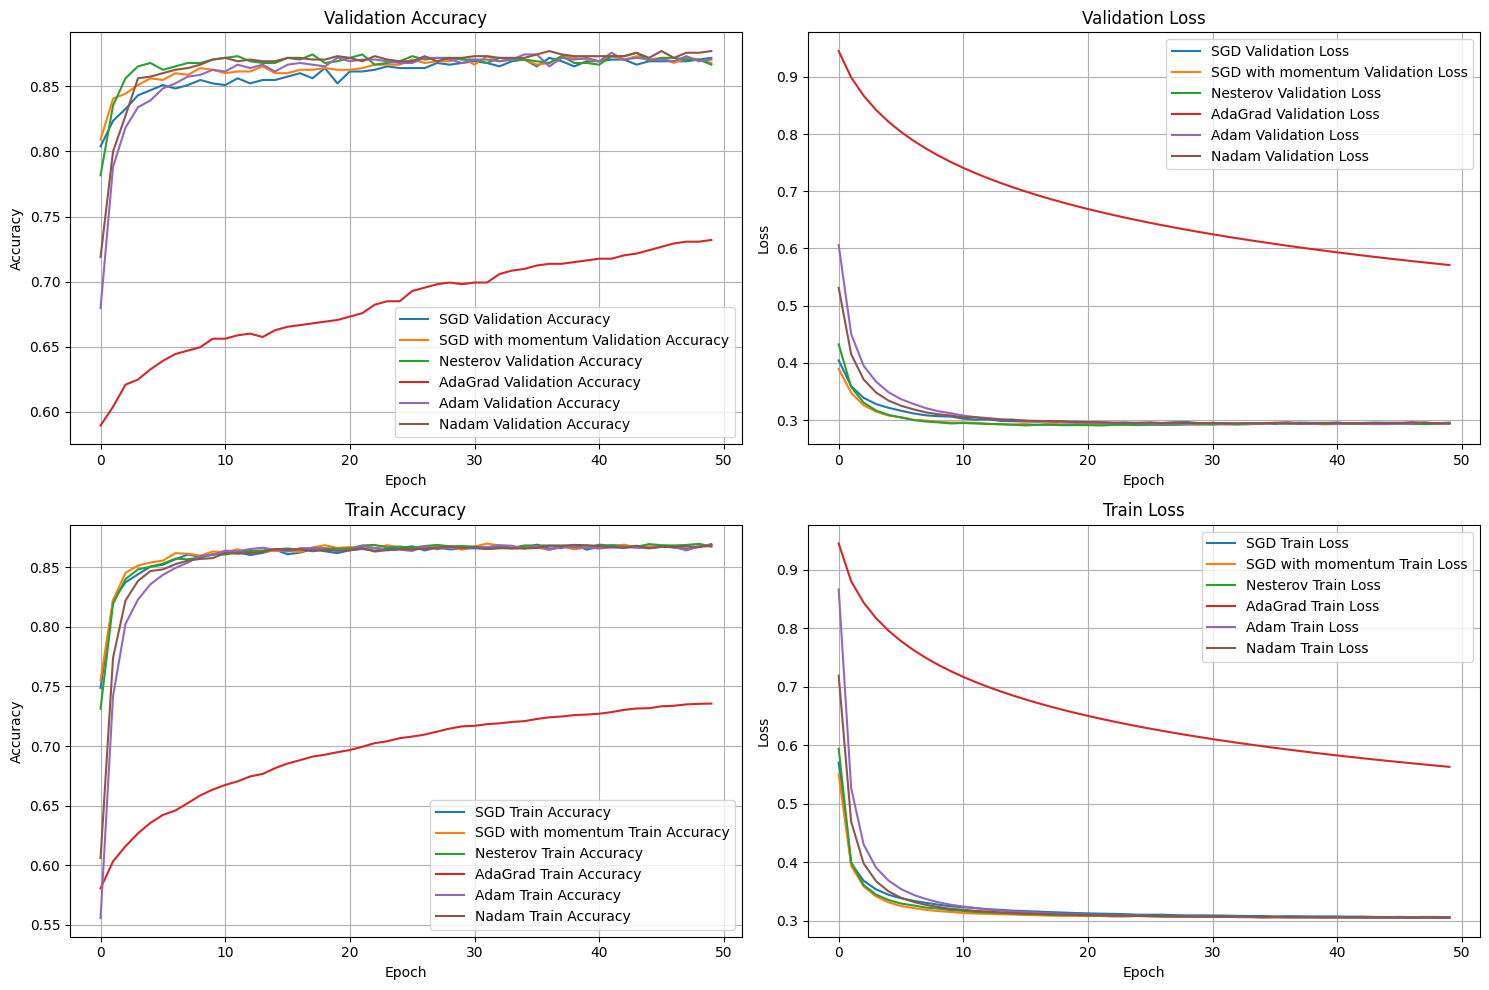

In [ ]:
plt.figure(figsize=(15, 10))

# Validation Accuracy
plt.subplot(2, 2, 1)
plt.plot(binary_model_history.history['val_accuracy'], label='SGD Validation Accuracy')
plt.plot(sgd_with_momentum_history.history['val_accuracy'], label='SGD with momentum Validation Accuracy')
plt.plot(nesterov_history.history['val_accuracy'], label='Nesterov Validation Accuracy')
plt.plot(adagrad_history.history['val_accuracy'], label='AdaGrad Validation Accuracy')
plt.plot(adam_history.history['val_accuracy'], label='Adam Validation Accuracy')
plt.plot(nadam_history.history['val_accuracy'], label='Nadam Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Validation Loss
plt.subplot(2, 2, 2)
plt.plot(binary_model_history.history['val_loss'], label='SGD Validation Loss')
plt.plot(sgd_with_momentum_history.history['val_loss'], label='SGD with momentum Validation Loss')
plt.plot(nesterov_history.history['val_loss'], label='Nesterov Validation Loss')
plt.plot(adagrad_history.history['val_loss'], label='AdaGrad Validation Loss')
plt.plot(adam_history.history['val_loss'], label='Adam Validation Loss')
plt.plot(nadam_history.history['val_loss'], label='Nadam Validation Loss')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Train Accuracy
plt.subplot(2, 2, 3)
plt.plot(binary_model_history.history['accuracy'], label='SGD Train Accuracy')
plt.plot(sgd_with_momentum_history.history['accuracy'], label='SGD with momentum Train Accuracy')
plt.plot(nesterov_history.history['accuracy'], label='Nesterov Train Accuracy')
plt.plot(adagrad_history.history['accuracy'], label='AdaGrad Train Accuracy')
plt.plot(adam_history.history['accuracy'], label='Adam Train Accuracy')
plt.plot(nadam_history.history['accuracy'], label='Nadam Train Accuracy')
plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Train Loss
plt.subplot(2, 2, 4)
plt.plot(binary_model_history.history['loss'], label='SGD Train Loss')
plt.plot(sgd_with_momentum_history.history['loss'], label='SGD with momentum Train Loss')
plt.plot(nesterov_history.history['loss'], label='Nesterov Train Loss')
plt.plot(adagrad_history.history['loss'], label='AdaGrad Train Loss')
plt.plot(adam_history.history['loss'], label='Adam Train Loss')
plt.plot(nadam_history.history['loss'], label='Nadam Train Loss')
plt.title('Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate on test data
binary_model_test_loss, binary_model_test_acc = binary_model.evaluate(X_test, y_test)
sgd_with_momentum_model_test_loss, sgd_with_momentum_model_test_acc = sgd_with_momentum_model.evaluate(X_test, y_test)
nesterov_test_loss, nesterov_test_acc = nesterov_sgd_model.evaluate(X_test, y_test)
adagrad_model_test_loss, adagrad_model_test_acc = adagrad_model.evaluate(X_test, y_test)
adam_model_test_loss, adam_model_test_acc = adam_model.evaluate(X_test, y_test)
nadam_model_test_loss, nadam_model_test_acc = nadam_model.evaluate(X_test, y_test)

print("SGD Model - Test Accuracy:", binary_model_test_acc, ", Test Loss:", binary_model_test_loss)
print("SGD with Momentum Model - Test Accuracy:", sgd_with_momentum_model_test_acc, ", Test Loss:", sgd_with_momentum_model_test_loss)
print("Nesterov Model  - Test Accuracy:", nesterov_test_acc, ", Test Loss:", nesterov_test_loss)
print("Adagrad Model - Test Accuracy:", adagrad_model_test_acc, ", Test Loss:", adagrad_model_test_loss)
print("Adam Model - Test Accuracy:", adam_model_test_acc, ", Test Loss:", adam_model_test_loss)
print("Nadam Model - Test Accuracy:", nadam_model_test_acc, ", Test Loss:", nadam_model_test_loss)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8795 - loss: 0.2944
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8777 - loss: 0.2934
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8786 - loss: 0.2937 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7529 - loss: 0.5270
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.2927 
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8752 - loss: 0.2951 
SGD Model - Test Accuracy: 0.8677777647972107 , Test Loss: 0.3127477467060089
SGD with Momentum Model - Test Accuracy: 0.8677777647972107 , Test Loss: 0.3103848695755005
Nesterov Model  - Test Accuracy: 0.8688889145851135 , Test Loss: 0.31092268228530884
Adagrad Model - Test Accuracy: 0.7477777600288391 , Test Loss: 0.5544565320014954
Adam Model - Test Accuracy: 0.8666666746139526 , Test Loss: 0.3099530041217804
Nadam Model - Test Accuracy: 0.8700000047683716 , Test Loss: 0.31180867552757263


| Optimizer      | Test Accuracy | Test Loss |
| -------------- | ------------- | --------- |
| SGD            | 0.8678        | 0.3127    |
| SGD + Momentum | 0.8678        | 0.3104    |
| SGD + Nesterov | 0.8689        | 0.3109    |
| AdaGrad        | 0.7478        | 0.5545    |
| Adam           | 0.8667        | 0.3099    |
| Nadam          | **0.8700**    | 0.3118    |


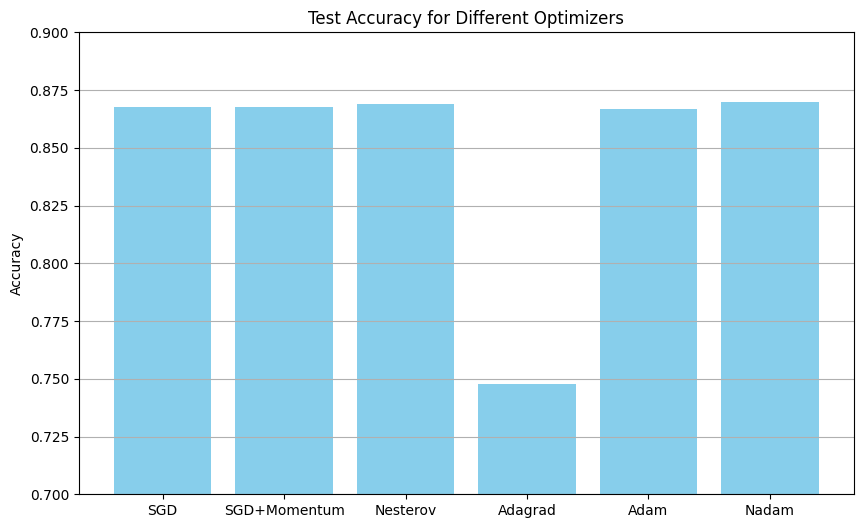

In [ ]:
optimizers = ['SGD', 'SGD+Momentum', 'Nesterov', 'Adagrad', 'Adam', 'Nadam']
test_accuracies = [0.8678, 0.8678, 0.8689, 0.7478, 0.8667, 0.8700]

plt.figure(figsize=(10, 6))
plt.bar(optimizers, test_accuracies, color='skyblue')
plt.ylim(0.7, 0.9)
plt.title('Test Accuracy for Different Optimizers')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()

In this experiment, we compared the performance of various optimizers on the test dataset. The Nadam optimizer achieved the highest test accuracy (87.0%), though the difference from other optimizers like Adam, Nesterov, and SGD was minor. Notably, Adagrad performed significantly worse, likely due to its rapid learning rate decay. Overall, momentum-based optimizers such as Nadam and Nesterov demonstrated more stable and effective performance for this task.

## Regularization Phase

### Dropout Technique

In [ ]:
#Split the data into training set and test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

X_train_full, X_test = X_train_full/255.0, X_test/255.0

#Split the training data into training set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.15, random_state = 42)

In [ ]:
selu_model_with_dropout = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),  # CIFAR-10 input
    keras.layers.Dense(150, activation='selu', kernel_initializer='lecun_normal'),  # Hidden Layer 1
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(50, activation='selu', kernel_initializer='lecun_normal'),   # Hidden Layer 2
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(50, activation='selu', kernel_initializer='lecun_normal'),   # Hidden Layer 3
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")  # Output layer for classification
])

In [ ]:
selu_model_with_dropout.compile(loss="categorical_crossentropy", optimizer= keras.optimizers.Adam(learning_rate = 0.000193), metrics=["accuracy"])

dropout_model_history = selu_model_with_dropout.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid))

Epoch 1/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.1735 - loss: 2.3456 - val_accuracy: 0.3251 - val_loss: 1.8890
Epoch 2/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.2664 - loss: 1.9837 - val_accuracy: 0.3324 - val_loss: 1.8532
Epoch 3/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3011 - loss: 1.9045 - val_accuracy: 0.3814 - val_loss: 1.8189
Epoch 4/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3326 - loss: 1.8351 - val_accuracy: 0.3936 - val_loss: 1.7257
Epoch 5/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3487 - loss: 1.7901 - val_accuracy: 0.4142 - val_loss: 1.6937
Epoch 6/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3668 - loss: 1.7532 - val_accuracy: 0.4102 - val_loss: 1.7403
Epoch 7/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3731 - loss: 1.7252 - val_accuracy: 0.4133 - val_loss: 1.6652
Epoch 8/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.3836 -

In [ ]:
# Evaluate on test data
test_loss, test_acc = selu_model_with_dropout.evaluate(X_test, y_test)

print("Dropout Model - Test Accuracy:", test_acc, ", Test Loss:", test_loss)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5250 - loss: 1.6084
Dropout Model - Test Accuracy: 0.5327777862548828 , Test Loss: 1.5831741094589233


Applying `AlphaDropout` regularization led to a slight improvement in test accuracy (from 47.1% to 53.27%) and a reduction in test loss (from 1.56 to 1.48). This suggests that dropout helped the model generalize better by reducing overfitting.

###  Monte-Carlo (MC) Dropout

In [ ]:
class MCAlphaDropoutModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten(input_shape=[32, 32, 3])
        self.dense1 = tf.keras.layers.Dense(150, activation='selu', kernel_initializer='lecun_normal')
        self.dropout1 = tf.keras.layers.AlphaDropout(0.2)
        self.dense2 = tf.keras.layers.Dense(50, activation='selu', kernel_initializer='lecun_normal')
        self.dropout2 = tf.keras.layers.AlphaDropout(0.2)
        self.dense3 = tf.keras.layers.Dense(50, activation='selu', kernel_initializer='lecun_normal')
        self.dropout3 = tf.keras.layers.AlphaDropout(0.2)
        self.output_layer = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs, training=False):
        x = self.flatten(inputs)
        x = self.dense1(x)
        x = self.dropout1(x, training=training)
        x = self.dense2(x)
        x = self.dropout2(x, training=training)
        x = self.dense3(x)
        x = self.dropout3(x, training=training)
        return self.output_layer(x)


In [ ]:
# build a model
mc_model = MCAlphaDropoutModel()
mc_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.000193),
              metrics=["accuracy"])

# train the model
mc_history = mc_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

# Monte Carlo predictions
y_probas = np.stack([
    mc_model(X_test, training=True).numpy() # Use training=True to activate dropout at test time for MC Dropout
    for _ in range(100)
])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

y_pred = np.argmax(y_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred == y_true)

print()
print("Test Accuracy with MC Dropout:", accuracy)
print()
print("Uncertainty (std):", y_std)

Epoch 1/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.1644 - loss: 2.3698 - val_accuracy: 0.3413 - val_loss: 1.8962
Epoch 2/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.2736 - loss: 1.9849 - val_accuracy: 0.3716 - val_loss: 1.8017
Epoch 3/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3088 - loss: 1.8915 - val_accuracy: 0.3877 - val_loss: 1.7715
Epoch 4/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.3371 - loss: 1.8313 - val_accuracy: 0.4065 - val_loss: 1.7341
Epoch 5/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3548 - loss: 1.7891 - val_accuracy: 0.4251 - val_loss: 1.6725
Epoch 6/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.3700 - loss: 1.7474 - val_accuracy: 0.4244 - val_loss: 1.6808
Epoch 7/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3770 - loss: 1.7269 - val_accuracy: 0.4297 - val_loss: 1.6706
Epoch 8/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3871 

### L1 + L2 Regularization

In [ ]:
l1_l2_reg = tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4)

model_l1_l2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(150, activation='selu', kernel_initializer='lecun_normal',
                 kernel_regularizer=l1_l2_reg),  #Adding L1L2 Regularization to Dense Layer
    keras.layers.Dense(50, activation='selu', kernel_initializer='lecun_normal',
                 kernel_regularizer=l1_l2_reg),
    keras.layers.Dense(50, activation='selu', kernel_initializer='lecun_normal',
                 kernel_regularizer=l1_l2_reg),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# compile model
model_l1_l2.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.000193),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train the model
model_l1l2_history = model_l1_l2.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.2880 - loss: 2.7382 - val_accuracy: 0.3826 - val_loss: 2.3410
Epoch 2/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3819 - loss: 2.3099 - val_accuracy: 0.4067 - val_loss: 2.1489
Epoch 3/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3999 - loss: 2.1261 - val_accuracy: 0.4161 - val_loss: 2.0101
Epoch 4/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4121 - loss: 2.0091 - val_accuracy: 0.4183 - val_loss: 1.9645
Epoch 5/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4224 - loss: 1.9346 - val_accuracy: 0.4361 - val_loss: 1.8870
Epoch 6/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4287 - loss: 1.9032 - val_accuracy: 0.4444 - val_loss: 1.8371
Epoch 7/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4391 - loss: 1.8536 - val_accuracy: 0.4310 - val_loss: 1.8851
Epoch 8/100
1355/1355 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.

In [ ]:
# Evaluate on test data
test_loss, test_acc = model_l1_l2.evaluate(X_test, y_test)

print("L1 + L2 Regularized Model - Test Accuracy:", test_acc, ", Test Loss:", test_loss)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5080 - loss: 1.5936
L1 + L2 Regularized Model - Test Accuracy: 0.5109999775886536 , Test Loss: 1.5961683988571167


### Plotting Regularizers Accuracy and Loss for Different Regularizers

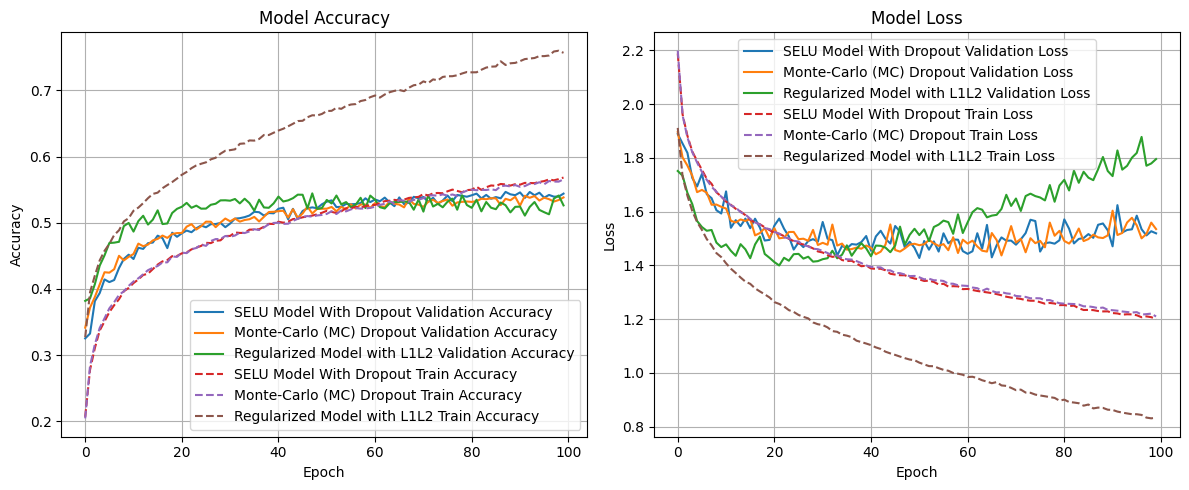

In [ ]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(dropout_model_history.history['val_accuracy'], label='SELU Model With Dropout Validation Accuracy')
plt.plot(mc_history.history['val_accuracy'], label='Monte-Carlo (MC) Dropout Validation Accuracy')
plt.plot(model_l1l2_history.history['val_accuracy'], label='Regularized Model with L1L2 Validation Accuracy')

plt.plot(dropout_model_history.history['accuracy'], '--', label='SELU Model With Dropout Train Accuracy')
plt.plot(mc_history.history['accuracy'], '--', label='Monte-Carlo (MC) Dropout Train Accuracy')
plt.plot(model_l1l2_history.history['accuracy'], '--', label='Regularized Model with L1L2 Train Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(dropout_model_history.history['val_loss'], label='SELU Model With Dropout Validation Loss')
plt.plot(mc_history.history['val_loss'], label='Monte-Carlo (MC) Dropout Validation Loss')
plt.plot(model_l1l2_history.history['val_loss'], label='Regularized Model with L1L2 Validation Loss')

plt.plot(dropout_model_history.history['loss'], '--', label='SELU Model With Dropout Train Loss')
plt.plot(mc_history.history['loss'], '--', label='Monte-Carlo (MC) Dropout Train Loss')
plt.plot(model_l1l2_history.history['loss'], '--', label='Regularized Model with L1L2 Train Loss')


plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In this project, a base model using the SELU activation function was trained, and then regularized using three different techniques: Dropout, Monte-Carlo (MC) Dropout, and combined L1/L2 regularization.

Based on the results:

- Both Dropout and MC Dropout provided slight improvements over the non-regularized baseline model.

- However, applying L1/L2 regularization, even with various parameter values, did not improve test performance and in some cases made it worse.Note that the question asked us to train the model up to 100 epochs and therefore I did not use early stopping.Maybe using early stopping with L1L2 regularizer could help us to achieve better results.

- As seen in the loss/accuracy plots, the L1/L2 model tended to overfit, with training accuracy increasing while validation accuracy remained steady or declined.

To sum up:

Regularization techniques had a positive effect on model performance — especially Dropout and MC Dropout — but L1/L2 regularization alone did not help.